# 6. Tabelarno predstavljeni podaci

U ovoj lekciji ćemo govoriti o:
1. predstavljanju tabelarno zadatih podataka pomoću listi u Pajtonu,
2. efikasnijem predstavljanju tabelarnih podataka koristeći biblioteku _pandas_,
3. vizuelizaciji tabelarno predstavljenih podataka, i
4. učitavanje tabela iz lokalnih i udaljenih resursa.

## 6.1. Predstavljanje tabelarno zadatih podataka pomoću listi

Najčešći način da organizujemo velike količine podataka je da ih predstavimo tabelom. Recimo, ova tabela sadrži podatke o jednoj grupi dece (pri čemu je, naravno, starost izražena u godinama, težina u kilogramima, a visina u centimetrima):

| __Ime__ | __Pol__ | __Starost__ | __Masa__ | __Visina__ |
|---|---|---|---|---|
|      Ana | ž | 13 | 46 | 160 |
|    Bojan | m | 14 | 52 | 165 |
|    Vlada | m | 13 | 47 | 157 |
|  Gordana | ž | 15 | 54 | 165 |
|    Dejan | m | 15 | 56 | 163 |
|    Đorđe | m | 13 | 45 | 159 |
|    Elena | ž | 14 | 49 | 161 |
|  Žaklina | ž | 15 | 52 | 164 |
|    Zoran | m | 15 | 57 | 167 |
|    Ivana | ž | 13 | 45 | 158 |
|    Jasna | ž | 14 | 51 | 162 |


Da bismo mogli mašinski da obrađujemo i analiziramo podatke, prvo ih moramo predstaviti u obliku neke strukture podataka. Jedan jednostavan način da se to uradi je da svaki red tabele predstavimo jednom listom, i da potom sve te liste zapakujemo u jednu veliku listu, recimo ovako:

In [1]:
podaci = [["Ana",     "ž", 13, 46, 160],
          ["Bojan",   "m", 14, 52, 165],
          ["Vlada",   "m", 13, 47, 157],
          ["Gordana", "ž", 15, 54, 165],
          ["Dejan",   "m", 15, 56, 163],
          ["Đorđe",   "m", 13, 45, 159],
          ["Elena",   "ž", 14, 49, 161],
          ["Žaklina", "ž", 15, 52, 164],
          ["Zoran",   "m", 15, 57, 167],
          ["Ivana",   "ž", 13, 45, 158],
          ["Jasna",   "ž", 14, 51, 162]]

Iz ovako predstavljenih podataka lako možemo dobiti podatke o svakom pojedinačnom detetu u grupi. Recimo, podatke o Dejanu dobijamo tako što ispišemo element liste sa indeksom 4 (_Pažnja! Prvi element liste ima indeks 0, zato podaci o Dejanu koji su navedeni u 5. redu tabele imaju indeks 4_):

In [2]:
podaci[4]

['Dejan', 'm', 15, 56, 163]

Ovaj način predstavljanja podataka, međutim, nije pogodan za obrade po kolonama. Recimo, ako želimo da izračunamo prosečnu visinu dece u grupi moramo da pišemo program. To nije nemoguće, čak nije ni teško, ali je nepraktično. Evo programa:

In [3]:
sum = 0
for dete in podaci:
    sum += dete[4]
float(sum) / len(podaci)

161.9090909090909

Program radi na sledeći način:

* prvo pomoćnu promenljivu `sum` postavimo na nulu (u njoj će se polako akumulirati zbir visina sve dece u grupi);
* nakon toga ciklus `for dete in podaci:` prođe kroz svako dete u grupi (jer svaki element liste `podaci` predstavlja podatke o jednom detetu) i na sumu doda njegovu visinu (visina deteta se nalazi na petom mestu u grupi podataka za to dete, a to je element liste sa indeksom 4);
* konačno, dobijeni zbir podelimo brojem podataka da bismo izračunali prosek.

Kao što smo već rekli, ovo nije jako teško, ali je nepraktično. Treba nam fleksibilnija struktura podataka.

## 6.2. Biblioteka _pandas_, struktura podataka _DataFrame_ i rad sa kolonama tabele

Za efikasno manipulisanje tabelarno predstavljenim podacima u Pajtonu razvijena je biblioteka _pandas_. Nju možemo uvesti kao što smo uvozili i ostale biblioteke (i uz put ćemo joj dati nadimak da bismo manje morali da kucamo):

In [4]:
import pandas as pd

Iz ove biblioteke ćemo koristiti strukturu podataka koja se zove _DataFrame_ (engl. _data_ znači "podaci", _frame_ znači "okvir", tako da _DataFrame_ znači "okvir sa podacima", odnosno "tabela").

Podatke o deci sada lako možemo da prepakujemo u _DataFrame_ pozivom funkcije sa istim imenom:

In [5]:
tabela = pd.DataFrame(podaci)

Prethodna komanda nije dala nikakav izlaz. Ona je prosto prepakovala podatke navedene u listi `podaci` u novu strukturu podataka. Da bismo se uverili da se radi samo o prepakivanju, ispisaćemo sadržaj promenljive `tabela`:

In [6]:
tabela

,0,1,2,3,4
0,Ana,ž,13,46,160
1,Bojan,m,14,52,165
2,Vlada,m,13,47,157
3,Gordana,ž,15,54,165
4,Dejan,m,15,56,163
5,Đorđe,m,13,45,159
6,Elena,ž,14,49,161
7,Žaklina,ž,15,52,164
8,Zoran,m,15,57,167
9,Ivana,ž,13,45,158


Da bi tabela bila preglednija, daćemo kolonama ime. Kolonama se ime daje prilikom prepakivanja, tako što se lista sa imenima kolona prosledi pomoćnom parametru `columns`:

In [7]:
tabela = pd.DataFrame(podaci)
tabela.columns=["Ime", "Pol", "Starost", "Masa", "Visina"]
tabela

,Ime,Pol,Starost,Masa,Visina
0,Ana,ž,13,46,160
1,Bojan,m,14,52,165
2,Vlada,m,13,47,157
3,Gordana,ž,15,54,165
4,Dejan,m,15,56,163
5,Đorđe,m,13,45,159
6,Elena,ž,14,49,161
7,Žaklina,ž,15,52,164
8,Zoran,m,15,57,167
9,Ivana,ž,13,45,158


Kada svaka kolona ima svoje ime, možemo da pristupimo pojedinačnim kolonama:

In [8]:
tabela["Ime"]

0         Ana
1       Bojan
2       Vlada
3     Gordana
4       Dejan
5       Đorđe
6       Elena
7     Žaklina
8       Zoran
9       Ivana
10      Jasna
Name: Ime, dtype: object

In [9]:
tabela["Visina"]

0     160
1     165
2     157
3     165
4     163
5     159
6     161
7     164
8     167
9     158
10    162
Name: Visina, dtype: int64

Imena svih kolona su uvek dostupna u obliku liste ovako:

In [10]:
tabela.columns

Index(['Ime', 'Pol', 'Starost', 'Masa', 'Visina'], dtype='object')

Pozivom jedne od sledećih funkcija lako možemo da vršimo elementarnu analizu podataka koji su predstavljeni tabelom:
* `sum` -- računa zbir elemenata u koloni (suma);
* `mean` -- računa prosek elemenata u koloni (aritmetička sredina se na engleskom kaže _arithmetic mean_);
* `median` -- računa medijanu elemenata u koloni;
* `min` -- računa vrednost najmanjeg elementa u koloni (minimum);
* `max` -- računa vrednost najvećeg elementa u koloni (maksimum).

Na primer, visina najnižeg deteta u grupi je:

In [11]:
tabela["Visina"].min()

157

Najstarije dete u grupi ima ovoliko godina:

In [12]:
tabela["Starost"].max()

15

Prosečna visina dece u grupi je:

In [13]:
tabela["Visina"].mean()

161.9090909090909

Medijalna visina:

In [14]:
tabela["Visina"].median()

162.0

Da li cela grupa može da stane u lift čija nosivost je 600 kg?

In [15]:
if tabela["Masa"].sum() <= 600:
    print("Mogu svi da stanu u lift.")
else:
    print("Ne. Zajedno su preteški.")

Mogu svi da stanu u lift.


## 6.3. Vizuelizacija tabelarno predstavljenih podataka

Vizuelizacija podataka iz tabele se svodi na to da se odaberu interesantne kolone tabele i prikažu nekom od tehnika koje smo ranije videli. Prvo ćemo učitati odgovarajuću biblioteku:

In [16]:
import matplotlib.pyplot as plt

Ako želimo histogramom da predstavimo visinu dece u grupi, odabraćemo kolone "Ime" i "Visina" i prikazati ih, recimo ovako:

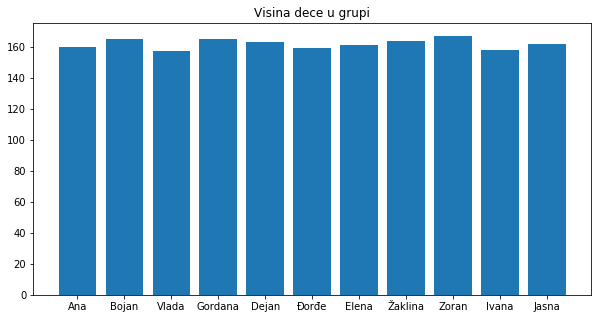

In [17]:
plt.figure(figsize=(10,5))
plt.bar(tabela["Ime"], tabela["Visina"])
plt.title("Visina dece u grupi")
plt.show()
plt.close()

Kao drugi primer predstavićemo težinu i starost dece u grupi tako da težina bude predstavljena crvenim stubićima, a starost zelenom. Prikazaćemo i legendu da bi bilo jasno šta koja boja predstavlja.

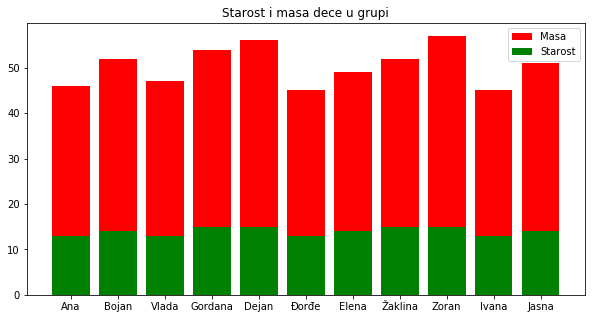

In [18]:
plt.figure(figsize=(10,5))
plt.bar(tabela["Ime"], tabela["Masa"], color="r", label="Masa")
plt.bar(tabela["Ime"], tabela["Starost"], color="g", label="Starost")
plt.title("Starost i masa dece u grupi")
plt.legend()
plt.show()
plt.close()

## 6.4. Učitavanje podataka iz lokalnih _CSV_ datoteka

Videli smo u prethodnim primerima da se najmukotrpniji posao obrade podataka sastoji u tome da se podaci unesu u tabelu. To je dosadan posao koji se često sastoji u tome da se podaci prosto prekucaju. Tabele sa kojima smo se sretali su zato bile veoma male. Moderna obrada podataka se, međutim, sve više usmerava na analizu _ogromnih_ količina podataka (engl. _big data_) i tu prekucavanje podataka ne dolazi u obzir.

Podaci se danas uglavnom prikupljaju automatski, i programi za prikupljanje podataka generišu velike tabele podataka koje posle treba obrađivati. Postoje razni formati za tabelarno predstavljanje podataka, a najjednostavniji od njih se zove _CSV_, (od engl. _comma separated values_ što znači "vrednosti razdvojene zarezima").

_CSV_ datoteka je tekstualna datoteka u kojoj redovi odgovaraju redovima tabele, a podaci unutar istog reda su razdvojeni zarezima. Na primer, u folderu _podaci_ se nalazi datoteka _Top 25 YouTubers.csv_ koja izgleda ovako:

    RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
    1,A++,T-Series,13629,105783888,76945588449
    2,A,PewDiePie,3898,97853589,22298927681
    3,A+,5-Minute Crafts,3341,58629572,14860695079
    4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951
    ...
    25,A,TheEllenShow,10542,33362512,16519572219

Ova tabela sadrži podatke o 25 najpopularnijih Jutjubera prema broju pretplatnika na dan 1.7.2019. Prvi red tabele predstavlja zaglavlje tabele koje nam kaže da tabela ima šest kolona (RANK, GRADE, NAME, VIDEOS, SUBSCRIBERS, VIEWES). Vrsta

    4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951

znači da je na dan 1.7.2019. četvrti po redu bio Jutjub kanal sa Jutjub rangom A++ koji se zove "Cocomelon - Nursery Rhymes" koji je objavio ukupno 441 video na Jutjubu, koji ima 53.163.816 pretplatnika i 33.519.273.951 pregleda.

Biblioteka `pandas` ima funkciju `read_csv` koja učitava _CSV_ datoteku i od nje pravi tabelu tipa _DataFrame_. Evo primera:

In [19]:
import pandas as pd
Top25 = pd.read_csv("podaci/Top 25 YouTubers.csv")

Prikažimo prvih nekoliko redova ove tabele. Funkcija `head(N)` prikazuje prvih N redova tabele (engl. _head_ znači "glava"). Ako funkciju pozovemo bez broja ona će prikazati prvih pet redova:

In [20]:
Top25.head()

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
0,1,A++,T-Series,13629,105783888,76945588449
1,2,A,PewDiePie,3898,97853589,22298927681
2,3,A+,5-Minute Crafts,3341,58629572,14860695079
3,4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951
4,5,A++,SET India,31923,51784081,36464793233


In [21]:
Top25.head(10)

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
0,1,A++,T-Series,13629,105783888,76945588449
1,2,A,PewDiePie,3898,97853589,22298927681
2,3,A+,5-Minute Crafts,3341,58629572,14860695079
3,4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951
4,5,A++,SET India,31923,51784081,36464793233
5,6,A+,Canal KondZilla,1100,50560964,25446405744
6,7,A+,WWE,42404,46098586,34085586984
7,8,B+,Justin Bieber,134,45873439,625649566
8,9,A,Dude Perfect,209,43796634,8354321862
9,10,A+,Badabun,4406,41131131,13175713909


Funkcija `tail(N)` prikazuje poslednjih N redova tabele, odnosno, poslednjih pet redova ako je pozvemo bez argumenta (engl. _tail_ znači "rep"):

In [22]:
Top25.tail()

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
20,21,B-,Katy Perry,97,34416819,361332307
21,22,A,Felipe Neto,1872,33549096,7458531306
22,23,A,JustinBieberVEVO,122,33514535,18873475304
23,24,A,Fernanfloo,534,33378699,7201866552
24,25,A,TheEllenShow,10542,33362512,16519572219


In [23]:
Top25.tail(7)

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
18,19,A-,elrubiusOMG,809,35324033,7772447040
19,20,B,Taylor Swift,166,34920060,255089844
20,21,B-,Katy Perry,97,34416819,361332307
21,22,A,Felipe Neto,1872,33549096,7458531306
22,23,A,JustinBieberVEVO,122,33514535,18873475304
23,24,A,Fernanfloo,534,33378699,7201866552
24,25,A,TheEllenShow,10542,33362512,16519572219


Prikažimo podatke o broju pretplatnika stubičastim dijagramom:

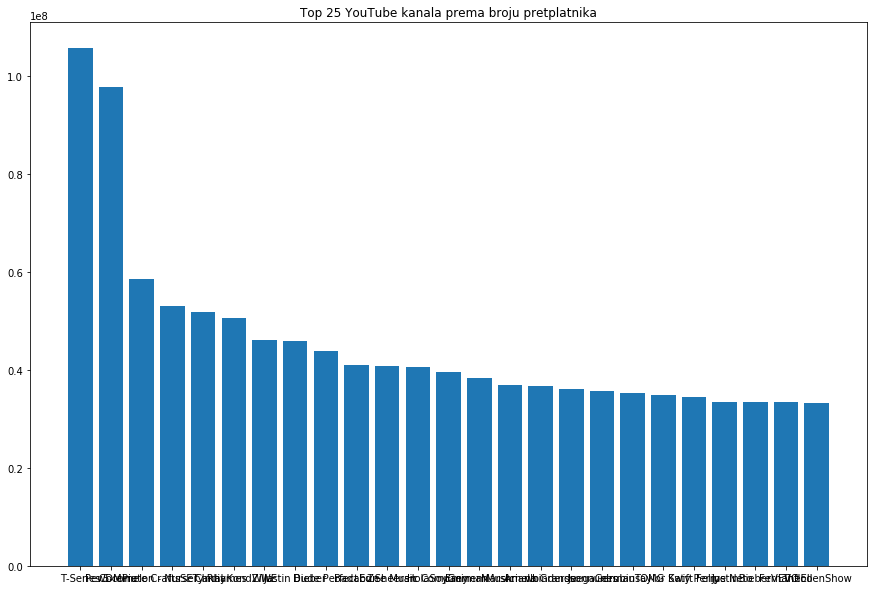

In [24]:
plt.figure(figsize=(15,10))
plt.bar(Top25["NAME"], Top25["SUBSCRIBERS"])
plt.title("Top 25 YouTube kanala prema broju pretplatnika")
plt.show()
plt.close()

Pošto su imena kanala veoma dugačka na horizontalnoj osi se ništa ne vidi. Zato ćemo umesto funkcije `bar` pozvati funkciju `barh` koja radi isti posao, ali stubiće iscrtava horizontalno:

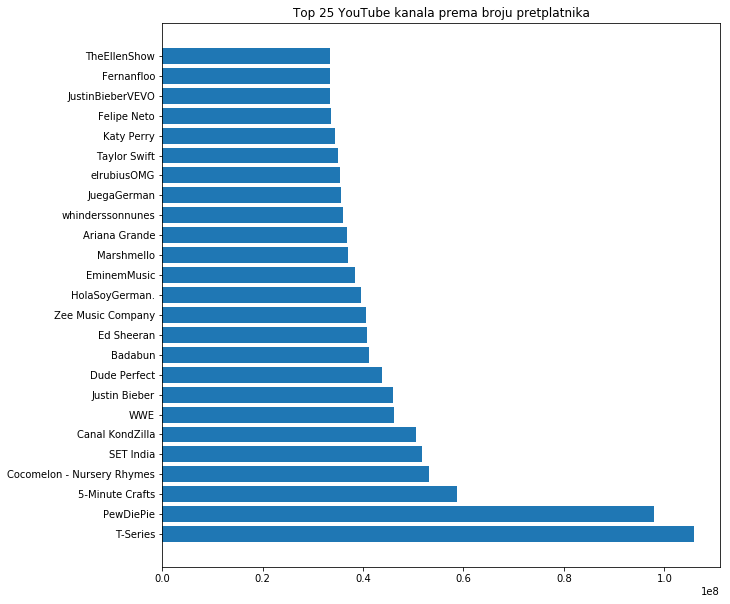

In [25]:
plt.figure(figsize=(10,10))
plt.barh(Top25["NAME"], Top25["SUBSCRIBERS"])
plt.title("Top 25 YouTube kanala prema broju pretplatnika")
plt.show()
plt.close()

## 6.5. Učitavanje podataka iz udaljenih resursa

Moguće je preuzeti i podatke sa udaljenih resursa bez potrebe da se oni prvo prebace na lokalnu mašinu. Da bismo pristupili podatku koji se nalazi na nekoj drugoj mašini potrebno je da obe mašine imaju pristup Internetu i da znamo tačnu lokaciju podatka na udaljenoj mašini. Tačna lokacija bilo kog resursa na Internetu je opisana njegovim _URL_-om (od engl. _Universal Resource Locator_, što znači "Univerzalni lokator resursa").

Na adresi

    https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv
    
se nalazi javno dostupan spisak svih država na svetu. Ovu tabelu možemo lako učitati naredbom `read_csv`:

In [26]:
drzave = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
drzave.head(10)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
5,Burundi,AFRICA
6,Cameroon,AFRICA
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA


Pomoću naredbe `read_html` može se pročitati i tabela direktno iz _HTML_ koda neke veb stranice. Recimo, sledeća naredba čita spisak svih federalnih jedinica Sjedinjenih Američkih Država sa odgovarajuće stranice Vikipedije:

In [27]:
US = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states", header=[0,1])[0]

Na veb strani koju čitamo može biti više tabela i zato funkcija `read_html` vraća _listu tabela_. Tabela koju želimo da vidimo je prva na navedenoj strani i zato iza naredbe sledi konstrukt `[0]`. Argument `header=[0,1]` znači da prve dve vrste treba uzeti za zaglavlje tabele. Evo kako izgleda tabela:

In [28]:
US.head()

,Name &postal abbreviation[1],Cities,Established[upper-alpha 1],Population[upper-alpha 2][3],Total area[4],Land area[4],Water area[4],Numberof Reps.,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0
,Capital,Largest[5],mi2,km2,mi2,km2,mi2,km2,Unnamed: 8_level_1,Unnamed: 9_level_1,Unnamed: 10_level_1,Unnamed: 11_level_1,Unnamed: 12_level_1
0,Alabama,AL,Montgomery,Birmingham,"Dec 14, 1819",4874747,52420,135767,50645,131171,1775,4597,7.0
1,Alaska,AK,Juneau,Anchorage,"Jan 3, 1959",739795,665384,1723337,570641,1477953,94743,245384,1.0
2,Arizona,AZ,Phoenix,"Feb 14, 1912",7016270,113990,295234,113594,294207,396,1026,9,NaN
3,Arkansas,AR,Little Rock,"Jun 15, 1836",3004279,53179,137732,52035,134771,1143,2961,4,NaN
4,California,CA,Sacramento,Los Angeles,"Sep 9, 1850",39536653,163695,423967,155779,403466,7916,20501,53.0


## 6.6. Zadaci

Zadatke reši u Džupajteru.

**Zadatak 1.** Pažljivo pogledaj ovaj Pajton program pa odgovori na pitanja koja slede:

157 161.5 161.5


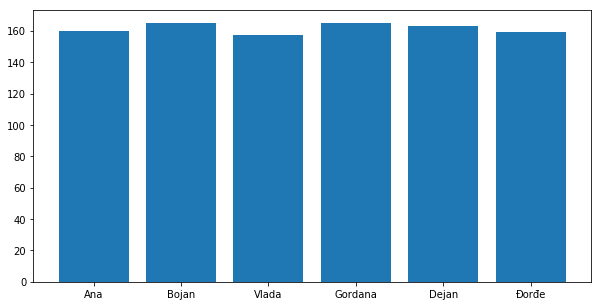

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

podaci = [["Ana",     "ž", 13, 46, 160],
          ["Bojan",   "m", 14, 52, 165],
          ["Vlada",   "m", 13, 47, 157],
          ["Gordana", "ž", 15, 54, 165],
          ["Dejan",   "m", 15, 56, 163],
          ["Đorđe",   "m", 13, 45, 159]]

tabela = pd.DataFrame(podaci)
tabela.columns=["Ime", "Pol", "Starost", "Masa", "Visina"]

print(tabela["Visina"].min(), tabela["Visina"].mean(), tabela["Visina"].median())

plt.figure(figsize=(10,5))
plt.bar(tabela["Ime"], tabela["Visina"])
plt.show()
plt.close()

temp_anomalije = pd.read_csv("podaci/TemperaturneAnomalije.csv", header=None)
drzave = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
US = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states", header=[0,1])[0]

1. Zašto učitavamo dve biblioteke?
2. Zašto ne radimo sa podacima u obliku liste, već komplikujemo sebi život strukturom podataka _DataFrame_ iz biblioteke _pandas_?
3. Kako se zovu kolone tabele `tabela`?
4. U čemu je razlika između funkcija `min`, `mean` i `median`?
5. Kako treba izmeniti program pa da na dijagramu pored visine dobijemo i grafički prikaz mase dece?
6. Kako bismo učitali tabelu `TemperaturneAnomalije.csv` kada bi ona imala zaglavlje?
7. Da li je tabela `drzave` formirana na osnovu podataka koji su smešteni lokalno, na tvom računaru?
8. U kom formatu su predstavljeni podaci na osnovu kojih je formirana tabela `US`?
9. Šta bi se desilo kada bi u internet pretraživač ukucao `https://simple.wikipedia.org/wiki/List_of_U.S._states`?

**Zadatak 2.** U sledećoj listi su dati podaci o nacionalnim parkovima Srbije. Za svaki nacionalni park je navedeno njegovo ime, površina u hektarima i godina osnivanja:

In [30]:
nac_parkovi = [["Fruška gora", 25393, 1960],
               ["Đerdap",      64000, 1974],
               ["Tara",        22000, 1981],
               ["Kopaonik",    11810, 1981],
               ["Šar-planina", 39000, 1985]]

_(a)_ Od ove liste napravi _DataFrame_ pa izračunaj prosečnu površinu nacionalnog parka (u hektarima), i ukupnu površinu koju zauzimaju nacionalni parkovi u Srbiji (u kvadratnim kilometrima; 1 kvadratni kilometar = 100 hektara).

_(b)_ Prikaži linijskim grafikonom površine nacionalnih parkova u Srbiji.

**Zadatak 3.** Proizvodnja kukuruza i pšenice u periodu 2008-2012. u Srbiji je data u sledećoj tabeli (podaci su iskazani u hiljadama tona):

| Godina | Kukuruz | Pšenica |
|--|--|--|
| 2008. | 6.158 | 2.095 |
| 2009. | 6.396 | 2.067 |
| 2010. | 7.207 | 1.631 |
| 2011. | 6.480 | 2.076 |
| 2012. | 3.532 | 1.911 |

_(a)_ Napravi odgovarajući _DataFrame_ pa izračunaj maksimalnu proizvodnju kukuruza i minimalnu proizvodnju pšenice u navedenom periodu. (Uputstvo: podatke prvo predstavi listom, a onda od liste napravi _DataFrame_.)

_(b)_ Na jednom grafikonu prikaži stubičastim dijagramom proizvodnju pšenice i kukuruza u navedenom periodu. (Vodi računa da prvo iscrtaš podatke za kukuruz, a onda preko toga podatke za pšenicu.)

_(v)_ Izračunaj prosečnu godišnju proizvodnju kukuruza za navedeni period, kao i za koliko se razlikovala proizvodnja pšenice u najboljoj i najlošijoj godini navedenog perioda (u hiljadama tona).

**Zadatak 4.** Evo troškova života jedne porodice tokom jedne godine, po mesecima (svi iznosi su predstavljeni u dinarima):
  
  | Stavka | Jan | Feb | Mar | Apr | Maj | Jun | Jul | Avg | Sep | Okt | Nov | Dec |
  |--------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
  | Stanarina | 8.251 | 8.436 | 8.524 | 8.388 | 8.241 | 8.196 | 8.004 | 7.996 | 7.991 | 8.015 | 8.353 | 8.456 |
  | Struja | 4.321 | 4.530 | 4.115 | 3.990 | 3.985 | 3.726 | 3.351 | 3.289 | 3.295 | 3.485 | 3.826 | 3.834 |
  | Telefon (fiksni) | 1.425 | 1.538 | 1.623 | 1.489 | 1.521 | 1.485 | 1.491 | 1.399 | 1.467 | 1.531 | 1.410 | 1.385 |
  | Telefon (mobilni) | 2.181 | 2.235 | 2.073 | 1.951 | 1.989 | 1.945 | 3.017 | 2.638 | 2.171 | 1.831 | 1.926 | 1.833 |
  | TV i internet | 2.399 | 2.399 | 2.399 | 2.399 | 2.399 | 2.399 | 2.399 | 2.399 | 2.399 | 2.399 | 2.399 | 2.399  |
  | Prevoz | 1.830 | 1.830 | 1.830 | 1.830 | 1.950 | 1.950 | 1.450 | 1.450 | 1.950 | 1.950 | 2.050 | 2.050 |
  | Hrana | 23.250 | 23.780 | 24.019 | 24.117 | 24.389 | 24.571 | 24.736 | 24.951 | 25.111 | 25.389 | 25.531 | 25.923 |
  | Ostalo | 4.500 | 3.700 | 5.100 | 3.500 | 2.750 | 4.250 | 7.320 | 8.250 | 3.270 | 4.290 | 3.200 | 8.390 |

U ćeliji ispod su isti podaci predstavljeni listom:

In [31]:
troskovi = [
  ["Stanarina", 8251, 8436, 8524, 8388, 8241, 8196, 8004, 7996, 7991, 8015, 8353, 8456],
  ["Struja", 4321, 4530, 4115, 3990, 3985, 3726, 3351, 3289, 3295, 3485, 3826, 3834],
  ["Telefon (fiksni)", 1425, 1538, 1623, 1489, 1521, 1485, 1491, 1399, 1467, 1531, 1410, 1385],
  ["Telefon (mobilni)", 2181, 2235, 2073, 1951, 1989, 1945, 3017, 2638, 2171, 1831, 1926, 1833],
  ["TV i internet", 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399 ],
  ["Prevoz", 1830, 1830, 1830, 1830, 1950, 1950, 1450, 1450, 1950, 1950, 2050, 2050],
  ["Hrana", 23250, 23780, 24019, 24117, 24389, 24571, 24736, 24951, 25111, 25389, 25531, 25923],
  ["Ostalo", 4500, 3700, 5100, 3500, 2750, 4250, 7320, 8250, 3270, 4290, 3200, 8390]
]

_(a)_ Predstavi tabelu strukturom _DataFrame_.

_(b)_ Izračunaj i ispiši _ukupne_ troškove ove porodice po mesecima (koliko je porodica ukupno potrošila u januarnu, koliko u februaru itd).

**Zadatak 5.** U datoteci _podaci/LEB.csv_ nalaze se podaci o očekivanoj dužini života osobe u trenutku rođenja (engl. _Life Expectancy at Birth_), po petogodišnjim periodima.

_(a)_ Učitaj datoteku u strukturu podataka _DataFrame_.

_(b)_ Prikaži ove podatke stubičastim dijagramom.

**Zadatak 6.** Učenici jednog razreda su skakali u dalj. Svaki učenik je skakao tri puta i rezultati su dati u datoteci _SkokUDalj.csv_ koja se nalazi u folderu _podaci_. Tabela ima zaglavlje i sastoji se od četiri kolone: "Prezime i ime", "Skok1", "Skok2" i "Skok3".

_(a)_ Učitaj datoteku u strukturu podataka _DataFrame_.

_(b)_ Prikaži ove podatke stubičastim dijagramom koji će imati tri grupe stubića, po jednu za svaki skok. Dijagram treba da ima legendu.

**Zadatak 7.** Na adresi

    https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

se nalazi javno dostupna tabela sa spiskom država sveta i nekim parametrima ekonomskog razvoja tih država praćenim u intervalima od 5 godina.

Tabela ima sledeće kolone:

* country = država
* year = godina na koju se odnose podaci
* pop = broj stanovnika (engl. _population_)
* continent = kontinent
* lifeExp = očekivani životni vek u godinama (engl. _life expextancy_)
* gdpPercap = BDP po glavi stanovnika u američkim dolarima (engl. _GDP per capitem_)

Učitaj ovu tabelu u strukturu podataka _DataFrame_ i prikaži prvih 20 redova tabele, kao i poslednjih 10 redova tabele.

**Zadatak 8.** Sa sledeće adrese

    https://www.worldometers.info/world-population/population-by-country/

učitaj tabelu koja sadrži podatke o svim državama na svetu i broju njihovih stanovnika. Prikaži prvih i poslednjeih nekoliko redova tabele.